# Chapter 11: Matrix Inverses 

## 11.1 Left and right inverses 

We will see in a later section how to find a left or right inverse when one exists.

In [5]:
A = [-3 -4;
      4  6
      1  1]

# B is a left inverse of A 
B = 1/9 * [-11 -10  16;
            7    8 -11]

# C is a left inverse of A 
C = 1/2 * [0 -1  6;
           0  1 -4];

In [4]:
B*A

2×2 Matrix{Float64}:
 1.0          -8.88178e-16
 2.22045e-16   1.0

In [6]:
C*A

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

## 11.2 Inverse 

if `A` is invertible, its inverse is given (in Julia) by `inv(A)` and also `A^-1`. You will get an error if A is not invertible or not square. 

In [10]:
A = [ 1 -2  3;
      0  2  2;
     -4 -4 -4]

#B = inv(A)
B = A^-1

3×3 Matrix{Float64}:
  0.0  -0.5  -0.25
 -0.2   0.2  -0.05
  0.2   0.3   0.05

In [11]:
B*A

3×3 Matrix{Float64}:
 1.0  0.0          0.0
 0.0  1.0          2.77556e-17
 0.0  5.55112e-17  1.0

In [12]:
A*B

3×3 Matrix{Float64}:
  1.0           1.11022e-16  0.0
  5.55112e-17   1.0          1.38778e-17
 -1.11022e-16  -2.22045e-16  1.0

**Dual basis** The next example illustrates the dual basis provided by the rows of the inverse $B = A^{-1}$. 

Let $a_1, \dots, a_n$ be the columns of $A$, and $b_1^T,\dots, b_n^T$ denote the *rows* of $B$ (i.e. the columns of $B^T$)

\begin{align}
A = \begin{bmatrix} a_1 & \dots & a_n\end{bmatrix} , \space \space \space
B = \begin{bmatrix} b_1^T \\ \vdots \\ b_n^T \end{bmatrix}
\end{align}

We know that $a_1, \dots, a_n$ form a basis, since the columns of $A$ are linearly independent. The vectors $b_1, \dots, b_n$ also form a basis, since the rows of $B$ are linearly independent. They are called the *dual basis* of $a_1, \dots, a_n$. (also the dual basis of $b_1, \dots, b_n$ is $a_1, \dots, a_n$, so they are called dual bases)

Any $n$-vector $x$ can be expressed as a linear combination of basis vectors $a_1, \dots, a_n$: 

\begin{align}
x = \beta_1 a_1 + \dots + \beta_n a_n
\end{align}

The dual basis gives us a simple way to find the coefficients $\beta_1, \dots, \beta_n$. We start with $AB = I$. Multiply by x to get 

\begin{align}
x = ABx = \begin{bmatrix} a_1 & \dots & a_n\end{bmatrix} \begin{bmatrix} b_1^T \\ \vdots \\ b_n^T \end{bmatrix} x = (b_1^T x) a_1 + \dots + (b_n^T x) a_n
\end{align}

Meaning, $\beta_i = b_i^T x$. 

Semantically, the coefficients in the expansion of a vector in a basis are given by the inner products with the dual basis vectors. Using matrix notation, we can say that the vector of coefficients of $x$ in the basis given by the columns of A:

\begin{align}
\beta = B^Tx = (A^{-1})^Tx
\end{align}

We calculate the expansion

\begin{align}
x &= ABx\\ &= \begin{bmatrix} a_1 & \dots & a_n\end{bmatrix} \begin{bmatrix} b_1^T \\ \vdots \\ b_n^T \end{bmatrix} x \\ &= (b_1^T x) a_1 + \dots + (b_n^T x) a_n
\end{align}

In [67]:
# example setup
A = [  1  0  1;
       4 -3 -4;
       1 -1 -2]

B = inv(A)

x = [0.2, -0.3, 1.2];

In [68]:
# calculating the right hand side (for 3-vector)

# first, mechanically
rhs = (B[1, :]'*x) * A[:,1] + (B[2, :]'*x) * A[:,2] + (B[3, :]'*x) * A[:,3]

3-element Vector{Float64}:
  0.1999999999999993
 -0.29999999999999716
  1.200000000000001

In [83]:
# using matrix notation ? 
beta = B*x
rhs = A*beta

3-element Vector{Float64}:
  0.1999999999999993
 -0.29999999999999716
  1.200000000000001

In [84]:
beta2 = B'*x
rhs2 = beta2'*A

1×3 adjoint(::Vector{Float64}) with eltype Float64:
 0.2  -0.3  1.2

**Inverse via QR factorization** THe inverse of matrix $A$ can be computed from its QR factorization $A = QR$ via the formula $A^{-1} = R^{-1}Q^T$.

In [21]:
n = 3;
A = randn(n,n); # create random square matrix 
inv(A)

3×3 Matrix{Float64}:
 0.0558137  -0.471965   0.151905
 0.447972   -0.479902   0.820387
 0.57143     0.15401   -0.310925

In [25]:
using LinearAlgebra
Q,R = qr(A);
Q = Matrix(Q);
Ainv = inv(R)*Q'

3×3 Matrix{Float64}:
 0.0558137  -0.471965   0.151905
 0.447972   -0.479902   0.820387
 0.57143     0.15401   -0.310925

In [27]:
norm(Ainv.-inv(A))

4.895240886109506e-16

## 11.3 Solving linear equations 

**Back substitution** Algorithm is as followed: \
**given** an $n \times n$ upper triangular matrix $R$ with nonzero diagonal entries, and an $n$-vector $b$.

For $i$ = $n, \dots, 1,$  
- $x_i = (b_i - R_{i,i+1}x_{x+1} - \dots - R_{i,n}x_n)/R_{ii}$


In [49]:
function backsub(R, b)
    n = length(b)
    x = zeros(n)
    for i=n:-1:1
        x[i] = b[i]
        # for j=i+1:n
        #     x[i] -= R[i, j] * x[j]
        # end
        # below is equivalent to above 
        x[i] -= R[i, i+1:n]'*x[i+1:n]
        x[i] /= R[i,i]
    end
    return x
end

backsub (generic function with 1 method)

In [50]:
# create a random 4x4 upper triangular matrix
# triu gives the upper triangular part of a matrix
# i.e. it zeros out the entries below the diagonal 
R = triu(randn(4,4)) 

b = rand(4);
x = backsub(R,b)

4-element Vector{Float64}:
 18.44173117344076
 -9.593016083485546
 11.927311970743924
 31.278928866479013

In [51]:
# prove that Rx = b 
norm(R*x-b) # should be around 0

1.4749679539501263e-15

**Backslash notation** is `x=A\b`, which is faster than `x=inv(A)*b`, which first computes the inverse of A and then multiplies it with b. 

Julia chooses a suitable algorithm for solving the equation after checking A's properties. For ex., it will use back substitution if A is lower triangular. 

In [55]:
n = 5000;
A = randn(n,n); b = randn(n);
@time x1 = A\b;
@time x2 = inv(A)*b;
norm(b-A*x1), norm(b-A*x2)

  0.331891 seconds (6 allocations: 190.811 MiB)
  1.016328 seconds (8 allocations: 193.253 MiB, 4.33% gc time)


(2.9562676016394e-9, 1.3874526006099036e-9)

In [85]:
n = 5000;
A = randn(n,n); b = randn(n);
@time x2 = A\b;
A = tril(A); # triu is upper triangular, tril is LOWER triangular 
@time x2 = A\b;

  0.300887 seconds (6 allocations: 190.811 MiB)
  0.010077 seconds (2 allocations: 39.172 KiB)


In [86]:
n = 10000;
A = randn(n,n); b = randn(n);
@time x2 = A\b;
A = tril(A); # triu is upper triangular, tril is LOWER triangular 
@time x2 = A\b;

  2.303775 seconds (6 allocations: 763.092 MiB, 0.05% gc time)
  0.056595 seconds (2 allocations: 78.172 KiB)


As $n$ doubles (5000 to 10000), solution time for triangular increases by a factor of 5.5 (approximately 4, consistent with $n^2$ complexity of backsubstitution). For the general square system, the complexity increases by a factor of 7.7 (approximately 8, consistent with $n^3$ complexity)


**Factor-solve methods for multiple right-hand sides**

Suppose you must solve several sets of linear euqations, 
\begin{align}
Ax_1 = b_1, \dots, Ax_k = b_k
\end{align}

Can express this as $AX = B$, where $X$ is the $n \times k$ matrix with columns $x_1, \dots, x_k$, and B is the $n \times k$ matrix with columns $b_1, \dots, b_k$. Assuming $A$ is invertible, the solution of $AX = B$ is $X = A^{-1}B$.

In [88]:
# say we had 2 systems of equations we wanted to solve 
n = 5000;
A = randn(n,n); B = randn(n,2);

# 1. solve individually 
@time x1 = A \ B[:,1];
@time x1 = A \ B[:,2];

# 2. naive approach for solving A*X = B (based from 1)
@time X = [ A\B[:,1] A\B[:,2] ];

# 3. factor-solve approach 
@time X = A \ B;

  0.300314 seconds (9 allocations: 190.850 MiB)
  0.330319 seconds (9 allocations: 190.850 MiB, 4.66% gc time)
  0.580569 seconds (20 allocations: 381.776 MiB)
  0.294741 seconds (6 allocations: 190.850 MiB)


## 11.4 Examples 

**Polynomial interpolation** We compute the interpolating polynomials. The following code uses the VMLS package functions `vandermonde` (computes A with the polynomial x values for x input) and `linspace(a,b,n)` (returns n-vector with equally spaced numbers in the interval [a,b].)

In [90]:
using VMLS
x = [-1.1,-.4,.2,.8];
A = vandermonde(x,4)

4×4 Matrix{Float64}:
 1.0  -1.1  1.21  -1.331
 1.0  -0.4  0.16  -0.064
 1.0   0.2  0.04   0.008
 1.0   0.8  0.64   0.512

In [92]:
b1 = [-1,1.3,1,.5]
c1 = A\b1

4-element Vector{Float64}:
  1.210956879377932
 -0.8883105198894671
 -1.1096651886125564
  1.3864790180579651

In [93]:
b2 = [ 1.0, 0.0, -2.0, 0 ];
c2 = A\b2

4-element Vector{Float64}:
 -1.5412891202364891
 -3.1090546880020575
  3.33847439110597
  3.695135274082643

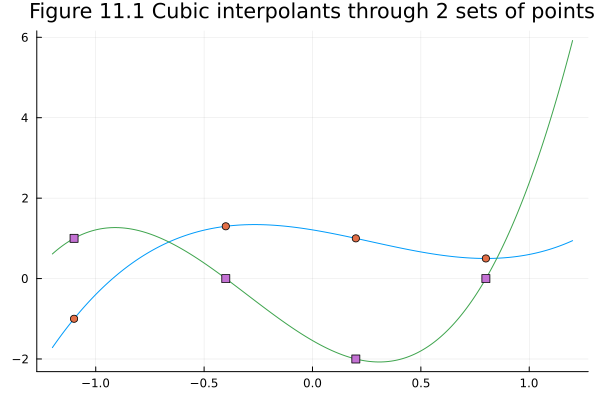

In [100]:
using Plots 
xs = linspace(-1.2, 1.2, 1000);
y1 = c1[1] .+ c1[2]*xs + c1[3]*xs.^2 + c1[4]*xs.^3
y2 = c2[1] .+ c2[2]*xs + c2[3]*xs.^2 + c2[4]*xs.^3

plot(xs,y1, legend=false)
scatter!(x, b1)
plot!(xs,y2)
scatter!(x, b2, marker=:square)
plot!(title="Figure 11.1 Cubic interpolants through 2 sets of points")

## 11.5 Pseudo-inverse 

In Julia, the pseudo-inverse of a matrix $A$ is obtained with `pinv(A)`. 

We will compute using the Julia function and via the formula $A^\dagger = R^{-1}Q^T$, where $A=QR$ is the QR factorization of $A$.

In [101]:
A = [-3 -4;
      4  6;
      1  1]

pinv(A)

2×3 Matrix{Float64}:
 -1.22222   -1.11111    1.77778
  0.777778   0.888889  -1.22222

In [103]:
Q,R = qr(A)
Q = Matrix(Q)
R \ Q'

2×3 Matrix{Float64}:
 -1.22222   -1.11111    1.77778
  0.777778   0.888889  -1.22222